In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Cancer data for the agegrp 60-69

In [2]:
import pickle
file = open("data_risk2_dummy","rb")
X_train = pickle.load(file)
y_train = pickle.load(file)
X_test = pickle.load(file)
y_test = pickle.load(file)
file.close()

In [3]:
X_train.head(2)

,menopaus_0,menopaus_1,agegrp_2,agegrp_3,agegrp_4,agegrp_5,agegrp_6,agegrp_7,agegrp_8,agegrp_9,...,nrelbc_1,nrelbc_2,brstproc_0,brstproc_1,lastmamm_0,lastmamm_1,surgmeno_0,surgmeno_1,hrt_0,hrt_1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
X_test.head(2)

,menopaus_0,menopaus_1,agegrp_2,agegrp_3,agegrp_4,agegrp_5,agegrp_6,agegrp_7,agegrp_8,agegrp_9,...,nrelbc_1,nrelbc_2,brstproc_0,brstproc_1,lastmamm_0,lastmamm_1,surgmeno_0,surgmeno_1,hrt_0,hrt_1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


# Model Building on Cancer Data

## <span style="color:blue">Model 3 - Weighted SVM with SGD</span>

### Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.

In [5]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score

def model_stats(X, y, y_pred, model):

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix ->")
    print(cm)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    
    print("Accuracy:",accuracy_score(y, y_pred))

    sensi = TP / float(TP+FN)
    speci = TN / float(TN+FP)
    
    # Let's see the sensitivity of our model
    print("Sensitivity:", sensi)

    # Let us calculate specificity
    print("Specificity:", speci)

    print("Average:", (sensi+speci)/2)
    
    # Let us calculate precision
    print("Precision",TP / float(TP+FP))
    print("MCC ", metrics.matthews_corrcoef(y, y_pred))
    print("F1 ", metrics.fbeta_score(y, y_pred, beta = 1))
    print("F2 ", metrics.fbeta_score(y, y_pred, beta = 2))
    print("F3 ", metrics.fbeta_score(y, y_pred, beta = 3))
    

In [6]:
# Importing random forest classifier from sklearn library
from sklearn.linear_model import SGDClassifier

In [7]:
sgd = SGDClassifier(random_state = 100)

# fit
sgd.fit(X_train,y_train)

SGDClassifier(random_state=100)

In [8]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_train_def = sgd.predict(X_train) # For train data
y_pred_test_def = sgd.predict(X_test) # For test data

#### Evaluating model on imbalanced train data with default parameters

In [9]:
# For train
model_stats(X_train, y_train, y_pred_train_def, sgd)

Confusion Matrix ->
[[109536      0]
 [  4293      0]]
Accuracy: 0.9622855335635031
Sensitivity: 0.0
Specificity: 1.0
Average: 0.5
Precision nan
MCC  0.0
F1  0.0
F2  0.0
F3  0.0


#### Evaluating model on imbalanced test data with default parameters

In [10]:
# For test
model_stats(X_test, y_test, y_pred_test_def, sgd)

Confusion Matrix ->
[[57930     0]
 [ 1571     0]]
Accuracy: 0.9735970824019764
Sensitivity: 0.0
Specificity: 1.0
Average: 0.5
Precision nan
MCC  0.0
F1  0.0
F2  0.0
F3  0.0


### Hyperparameter Tuning : Grid Search to Find Optimal Hyperparameters


In [11]:
sgd = SGDClassifier(class_weight = 'balanced', random_state = 100)

# Fit the grid search to the data
sgd.fit(X_train, y_train)

SGDClassifier(class_weight='balanced', random_state=100)

In [12]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_train_def = sgd.predict(X_train) # For train data
y_pred_test_def = sgd.predict(X_test) # For test data

In [13]:
#### Evaluating model on imbalanced train data with default parameters

# For train
model_stats(X_train, y_train, y_pred_train_def, sgd)

Confusion Matrix ->
[[58158 51378]
 [  828  3465]]
Accuracy: 0.5413646785968427
Sensitivity: 0.8071278825995807
Specificity: 0.5309487291849255
Average: 0.6690383058922531
Precision 0.0631803511842897
MCC  0.12889585013522065
F1  0.11718750000000001
F2  0.24057488023328474
F3  0.37066752246469836


In [14]:
#### Evaluating model on imbalanced test data with default parameters

# For test
model_stats(X_test, y_test, y_pred_test_def, sgd)

Confusion Matrix ->
[[25888 32042]
 [  301  1270]]
Accuracy: 0.45642930370918133
Sensitivity: 0.8084022915340547
Specificity: 0.4468841705506646
Average: 0.6276432310423596
Precision 0.03812439961575408
MCC  0.08245325969986117
F1  0.07281483817332225
F2  0.16036973431659765
F3  0.2676445175022655


In [15]:
# We can now find the optimal hyperparameters using GridSearchCV.
from sklearn.model_selection import GridSearchCV,StratifiedKFold

# Create a cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Create the parameter grid based on the results of random search 
param_grid = {
    'loss': ['hinge','squared_hinge']
}

sgd = SGDClassifier(class_weight = 'balanced', random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = sgd, param_grid = param_grid, scoring='balanced_accuracy',
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

By default the loss is 'hinge'

In [16]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'] 
}

sgd = SGDClassifier(class_weight = 'balanced', random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = sgd, param_grid = param_grid, scoring='balanced_accuracy',
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   11.9s finished


best balanced accuracy 0.6859736656984305
SGDClassifier(class_weight='balanced', penalty='l1', random_state=100)


In [17]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_iter' : [200, 400, 600, 800] 
}

sgd = SGDClassifier(class_weight = 'balanced', penalty='l1', random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = sgd, param_grid = param_grid, scoring='balanced_accuracy',
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.4s finished


best balanced accuracy 0.6859736656984305
SGDClassifier(class_weight='balanced', max_iter=200, penalty='l1',
              random_state=100)


In [18]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
}

sgd = SGDClassifier(class_weight = 'balanced', penalty='l1', max_iter=200, random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = sgd, param_grid = param_grid, scoring='balanced_accuracy',
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   31.5s finished


best balanced accuracy 0.6884595387998111
SGDClassifier(alpha=0.001, class_weight='balanced', max_iter=200, penalty='l1',
              random_state=100)


In [19]:
### Model using best parameters obtained from grid search

sgd = SGDClassifier(class_weight = 'balanced', max_iter=200, penalty='l1', alpha=0.001, random_state = 100)

# Fit the grid search to the data
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, class_weight='balanced', max_iter=200, penalty='l1',
              random_state=100)

In [20]:
#### Model evaluation on train data

# Predicting on test dataframe using predict
y_pred_train = sgd.predict(X_train)

model_stats(X_train, y_train, y_pred_train, sgd)

Confusion Matrix ->
[[71826 37710]
 [ 1189  3104]]
Accuracy: 0.6582681039102514
Sensitivity: 0.7230375029117168
Specificity: 0.6557296231375986
Average: 0.6893835630246576
Precision 0.07605233498309404
MCC  0.1504598196146055
F1  0.13762830602788922
F2  0.2676508122650295
F3  0.39068104869668097


In [21]:
sgd.coef_

array([[ 0.68075747,  0.        ,  0.02527174,  0.        ,  0.17055474,
         0.32989477,  0.51013463,  0.53454853,  0.56105752,  0.32970447,
         0.        , -1.51779608, -0.1457671 , -0.04907047, -0.46972761,
         0.38456845, -1.23369489, -0.52928341, -1.48707145, -1.31042548,
         0.85164079, -0.65360308, -0.16998494, -0.28930383, -0.64960956,
        -0.8821645 , -0.36170418, -0.88249828, -0.84763705,  0.54745248,
         0.        , -0.75574197,  0.51094046,  0.14460108,  0.04094397,
        -1.12145093,  0.15241074, -0.19312854,  0.12695967,  0.14085879]])

In [22]:
# List of cols with their coefficients
val=sgd.coef_.reshape(-1)
coef = (pd.DataFrame(val, index=X_train.columns, columns = ['Coefficients'] )).reset_index()
coef = coef.rename(columns={'index':'Features'})
coef = coef.sort_values(by = 'Coefficients', ascending=False)
coef

,Features,Coefficients
20,hispanic_0,0.851641
0,menopaus_0,0.680757
8,agegrp_8,0.561058
29,nrelbc_0,0.547452
7,agegrp_7,0.534549
32,brstproc_0,0.510940
6,agegrp_6,0.510135
15,race_1,0.384568
5,agegrp_5,0.329895
9,agegrp_9,0.329704


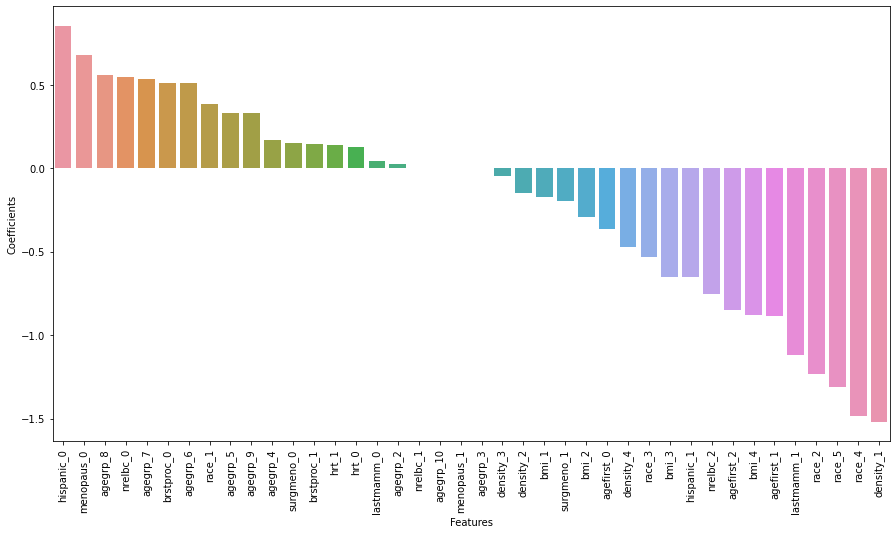

In [23]:
# Plotting important features against their coefficients
plt.figure(figsize=(15,8))
plt.subplot(111)
ax1 = sns.barplot(x = coef['Features'], y = coef['Coefficients'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)
#plt.ylabel('Coefficients')
plt.show()

#### Model evaluation on test data

In [24]:
# Predicting on test dataframe using predict

y_pred_test = sgd.predict(X_test)
model_stats(X_test, y_test, y_pred_test, sgd)

Confusion Matrix ->
[[33291 24639]
 [  421  1150]]
Accuracy: 0.578830607888943
Sensitivity: 0.732017823042648
Specificity: 0.5746763335059555
Average: 0.6533470782743017
Precision 0.04459265578347357
MCC  0.09922836785848378
F1  0.08406432748538012
F2  0.1792785208742556
F3  0.28801843317972353


In [25]:
from sklearn.calibration import CalibratedClassifierCV
ccv = CalibratedClassifierCV(sgd, cv='prefit')
ccv.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001,
                                                    class_weight='balanced',
                                                    max_iter=200, penalty='l1',
                                                    random_state=100),
                       cv='prefit')

In [26]:
# Predicting probability for roc_auc
def cal_roc(model, X, y):
    pred_probs = model.predict_proba(X)[:,1]
    print("ROC-AUC : {:2.2}".format(roc_auc_score(y, pred_probs)))

    # Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y, pred_probs, drop_intermediate = False )
    auc_score = roc_auc_score(y, pred_probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ROC-AUC : 0.76


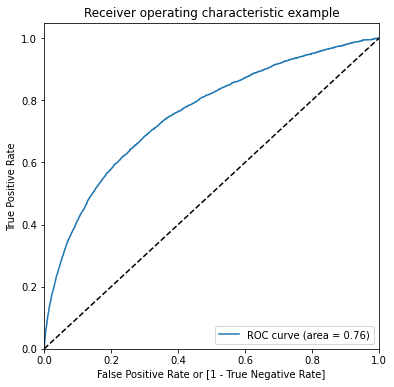

In [27]:
cal_roc(ccv, X_train, y_train)

ROC-AUC : 0.72


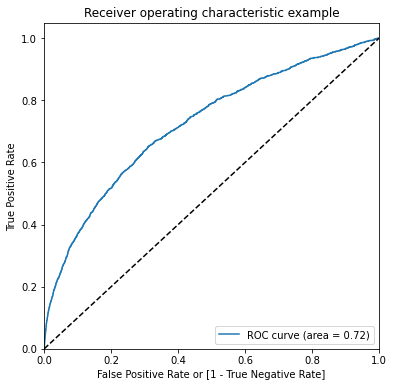

In [28]:
cal_roc(ccv, X_test, y_test)